In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
print("Please upload the 'insurance.csv' file.")
uploaded = files.upload()

Please upload the 'insurance.csv' file.


Saving insurance.csv to insurance.csv


In [3]:
file_name = list(uploaded.keys())[0]
print(f"\nLoaded file: {file_name}")
insurance_data = pd.read_csv(file_name)
print("\nFirst 5 rows of the dataset:")
print(insurance_data.head())


Loaded file: insurance.csv

First 5 rows of the dataset:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


Create R-like structures

In [4]:
print("\n(a) Creating R-like structures...")
ages = insurance_data['age'].values
expenses = insurance_data['expenses'].values
print("\nVector (Ages):", ages[:5])  # Display first 5 ages
print("Vector (Expenses):", expenses[:5])


(a) Creating R-like structures...

Vector (Ages): [19 18 28 33 32]
Vector (Expenses): [16884.92  1725.55  4449.46 21984.47  3866.86]


In [5]:
sex_factor = pd.Categorical(insurance_data['sex'])
print("\nFactor (Sex categories):", sex_factor.categories)

data_list = {
    "ages": ages,
    "expenses": expenses,
    "sex": insurance_data['sex'].tolist()
}
print("\nList Example:")
print({key: value[:5] for key, value in data_list.items()})
matrix = insurance_data[['age', 'bmi', 'children']].to_numpy()
print("\nMatrix Example (First 5 Rows):")
print(matrix[:5])
print("\nData Frame loaded successfully!")



Factor (Sex categories): Index(['female', 'male'], dtype='object')

List Example:
{'ages': array([19, 18, 28, 33, 32]), 'expenses': array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86]), 'sex': ['female', 'male', 'male', 'male', 'male']}

Matrix Example (First 5 Rows):
[[19.  27.9  0. ]
 [18.  33.8  1. ]
 [28.  33.   3. ]
 [33.  22.7  0. ]
 [32.  28.9  0. ]]

Data Frame loaded successfully!


Generate a scatter plot and customize


(b) Generating scatter plot for Age vs. Expenses...


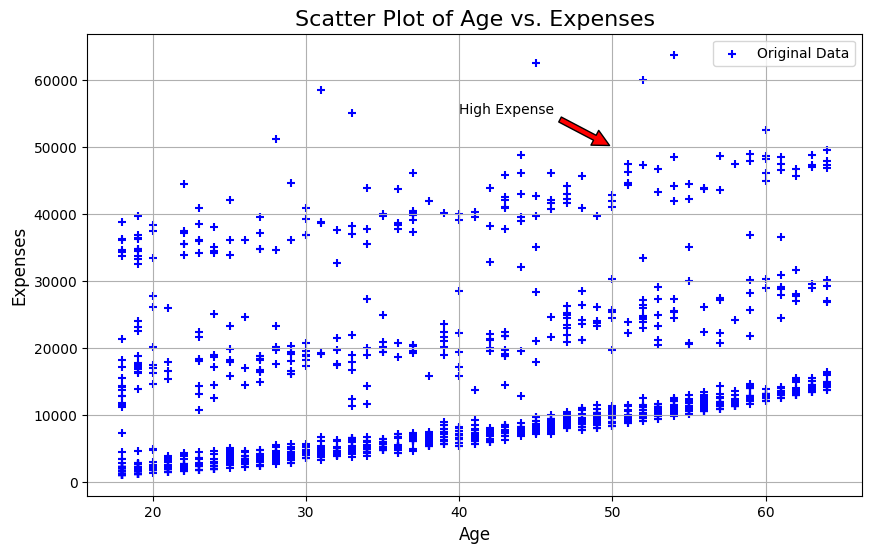

In [6]:
print("\n(b) Generating scatter plot for Age vs. Expenses...")
plt.figure(figsize=(10, 6))
plt.scatter(ages, expenses, c='blue', marker='+', label='Original Data')
plt.title('Scatter Plot of Age vs. Expenses', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Expenses', fontsize=12)
plt.annotate('High Expense', xy=(50, 50000), xytext=(40, 55000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

Filter data based on a condition


(c) Filtering data for smokers only...
Number of smokers in the dataset: 274

First 5 rows of the filtered data:
    age     sex   bmi  children smoker     region  expenses
0    19  female  27.9         0    yes  southwest  16884.92
11   62  female  26.3         0    yes  southeast  27808.73
14   27    male  42.1         0    yes  southeast  39611.76
19   30    male  35.3         0    yes  southwest  36837.47
23   34  female  31.9         1    yes  northeast  37701.88

Generating scatter plot for Age vs. Expenses (Smokers Only)...


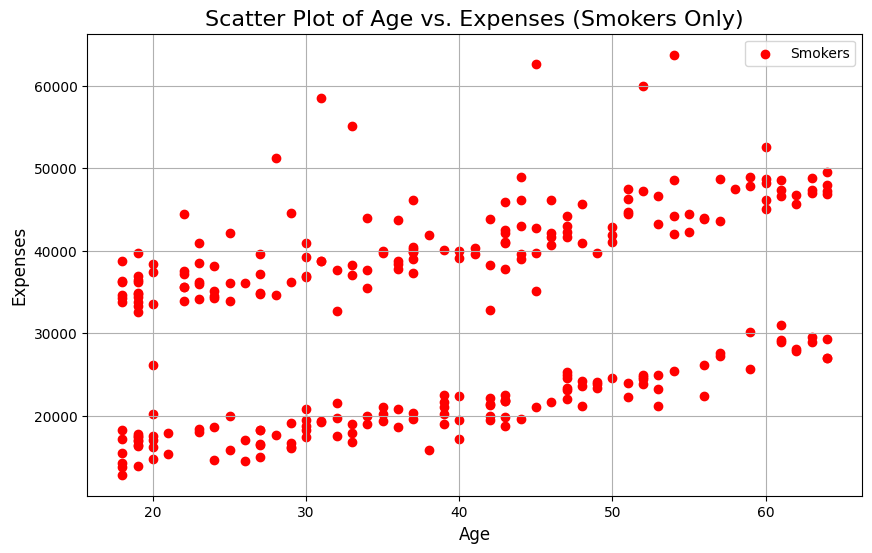

In [7]:
print("\n(c) Filtering data for smokers only...")
filtered_data = insurance_data[insurance_data['smoker'] == 'yes']
print(f"Number of smokers in the dataset: {len(filtered_data)}")
print("\nFirst 5 rows of the filtered data:")
print(filtered_data.head())

print("\nGenerating scatter plot for Age vs. Expenses (Smokers Only)...")
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['age'], filtered_data['expenses'], c='red', marker='o', label='Smokers')
plt.title('Scatter Plot of Age vs. Expenses (Smokers Only)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Expenses', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import seaborn as sns

# Generate synthetic insurance-like data
np.random.seed(42)
data = {
    "age": np.random.randint(18, 65, 200),
    "smoker": np.random.choice(["yes", "no"], 200),
    "expenses": np.random.randint(2000, 20000, 200),
    "gender": np.random.choice(["male", "female"], 200),
}
insurance_data = pd.DataFrame(data)

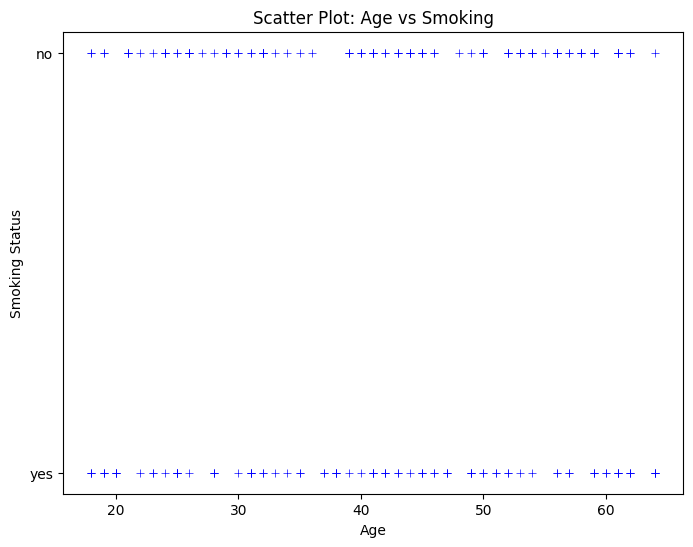

In [10]:
# Task 1: Scatter plot between age and smoking
plt.figure(figsize=(8, 6))
sns.scatterplot(x=insurance_data["age"], y=insurance_data["smoker"], marker='+', color='blue')
plt.title("Scatter Plot: Age vs Smoking")
plt.xlabel("Age")
plt.ylabel("Smoking Status")
plt.show()

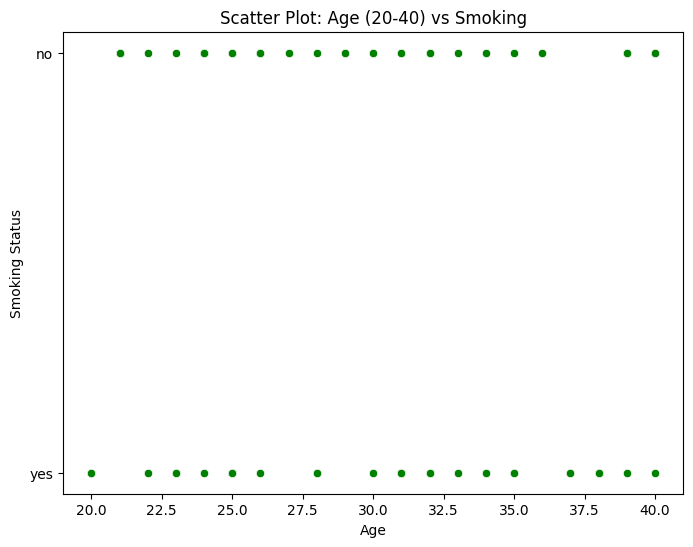

In [11]:
filtered_data = insurance_data[(insurance_data["age"] >= 20) & (insurance_data["age"] <= 40)]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_data["age"], y=filtered_data["smoker"], marker='o', color='green')
plt.title("Scatter Plot: Age (20-40) vs Smoking")
plt.xlabel("Age")
plt.ylabel("Smoking Status")
plt.show()


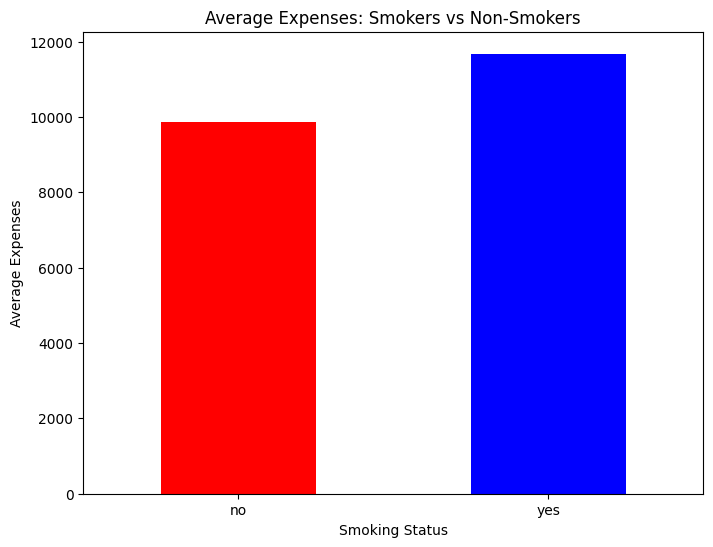

In [12]:
expenses_by_smoking = insurance_data.groupby("smoker")["expenses"].mean()
expenses_by_smoking.plot(kind="bar", color=["red", "blue"], figsize=(8, 6))
plt.title("Average Expenses: Smokers vs Non-Smokers")
plt.ylabel("Average Expenses")
plt.xlabel("Smoking Status")
plt.xticks(rotation=0)
plt.show()

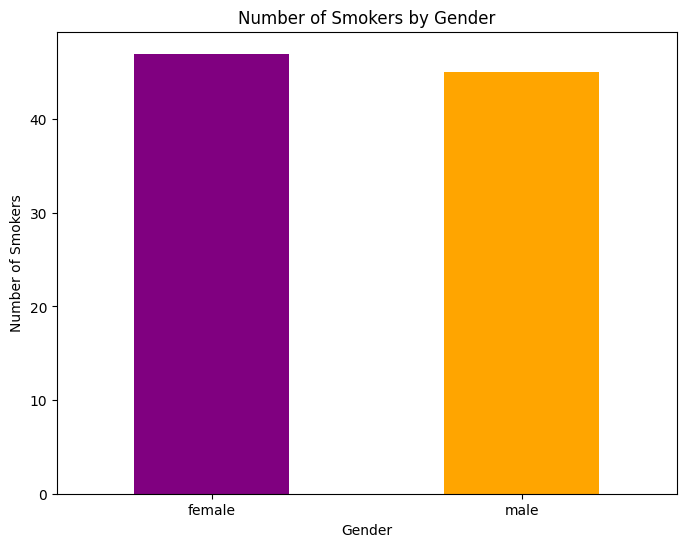

In [13]:
smokers_by_gender = insurance_data[insurance_data["smoker"] == "yes"].groupby("gender").size()
smokers_by_gender.plot(kind="bar", color=["purple", "orange"], figsize=(8, 6))
plt.title("Number of Smokers by Gender")
plt.ylabel("Number of Smokers")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()

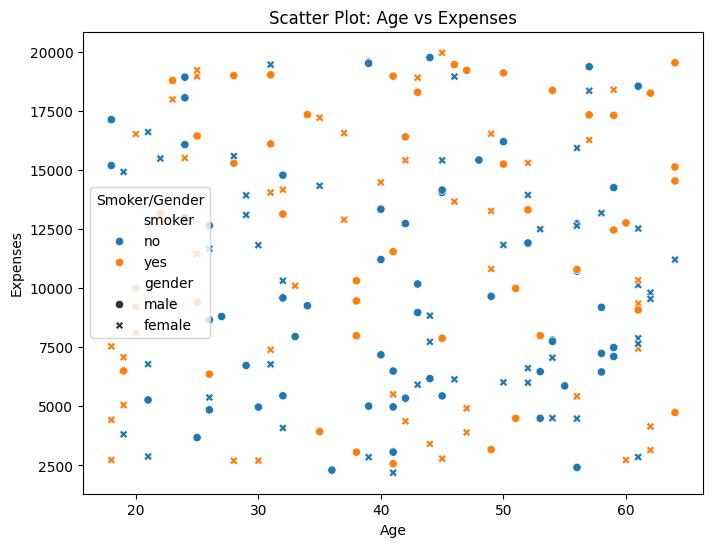

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=insurance_data["age"], y=insurance_data["expenses"], hue=insurance_data["smoker"], style=insurance_data["gender"])
plt.title("Scatter Plot: Age vs Expenses")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend(title="Smoker/Gender")
plt.show()